In [63]:
%matplotlib inline

In [64]:
import pandas as pd
import numpy as np

from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor


In [65]:
concrete_df = pd.read_csv("d:\ml_data\concrete.csv")

In [66]:
len(concrete_df)

1030

In [67]:
concrete_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [68]:
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [69]:
concrete_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [70]:
actual_strength = concrete_df.strength

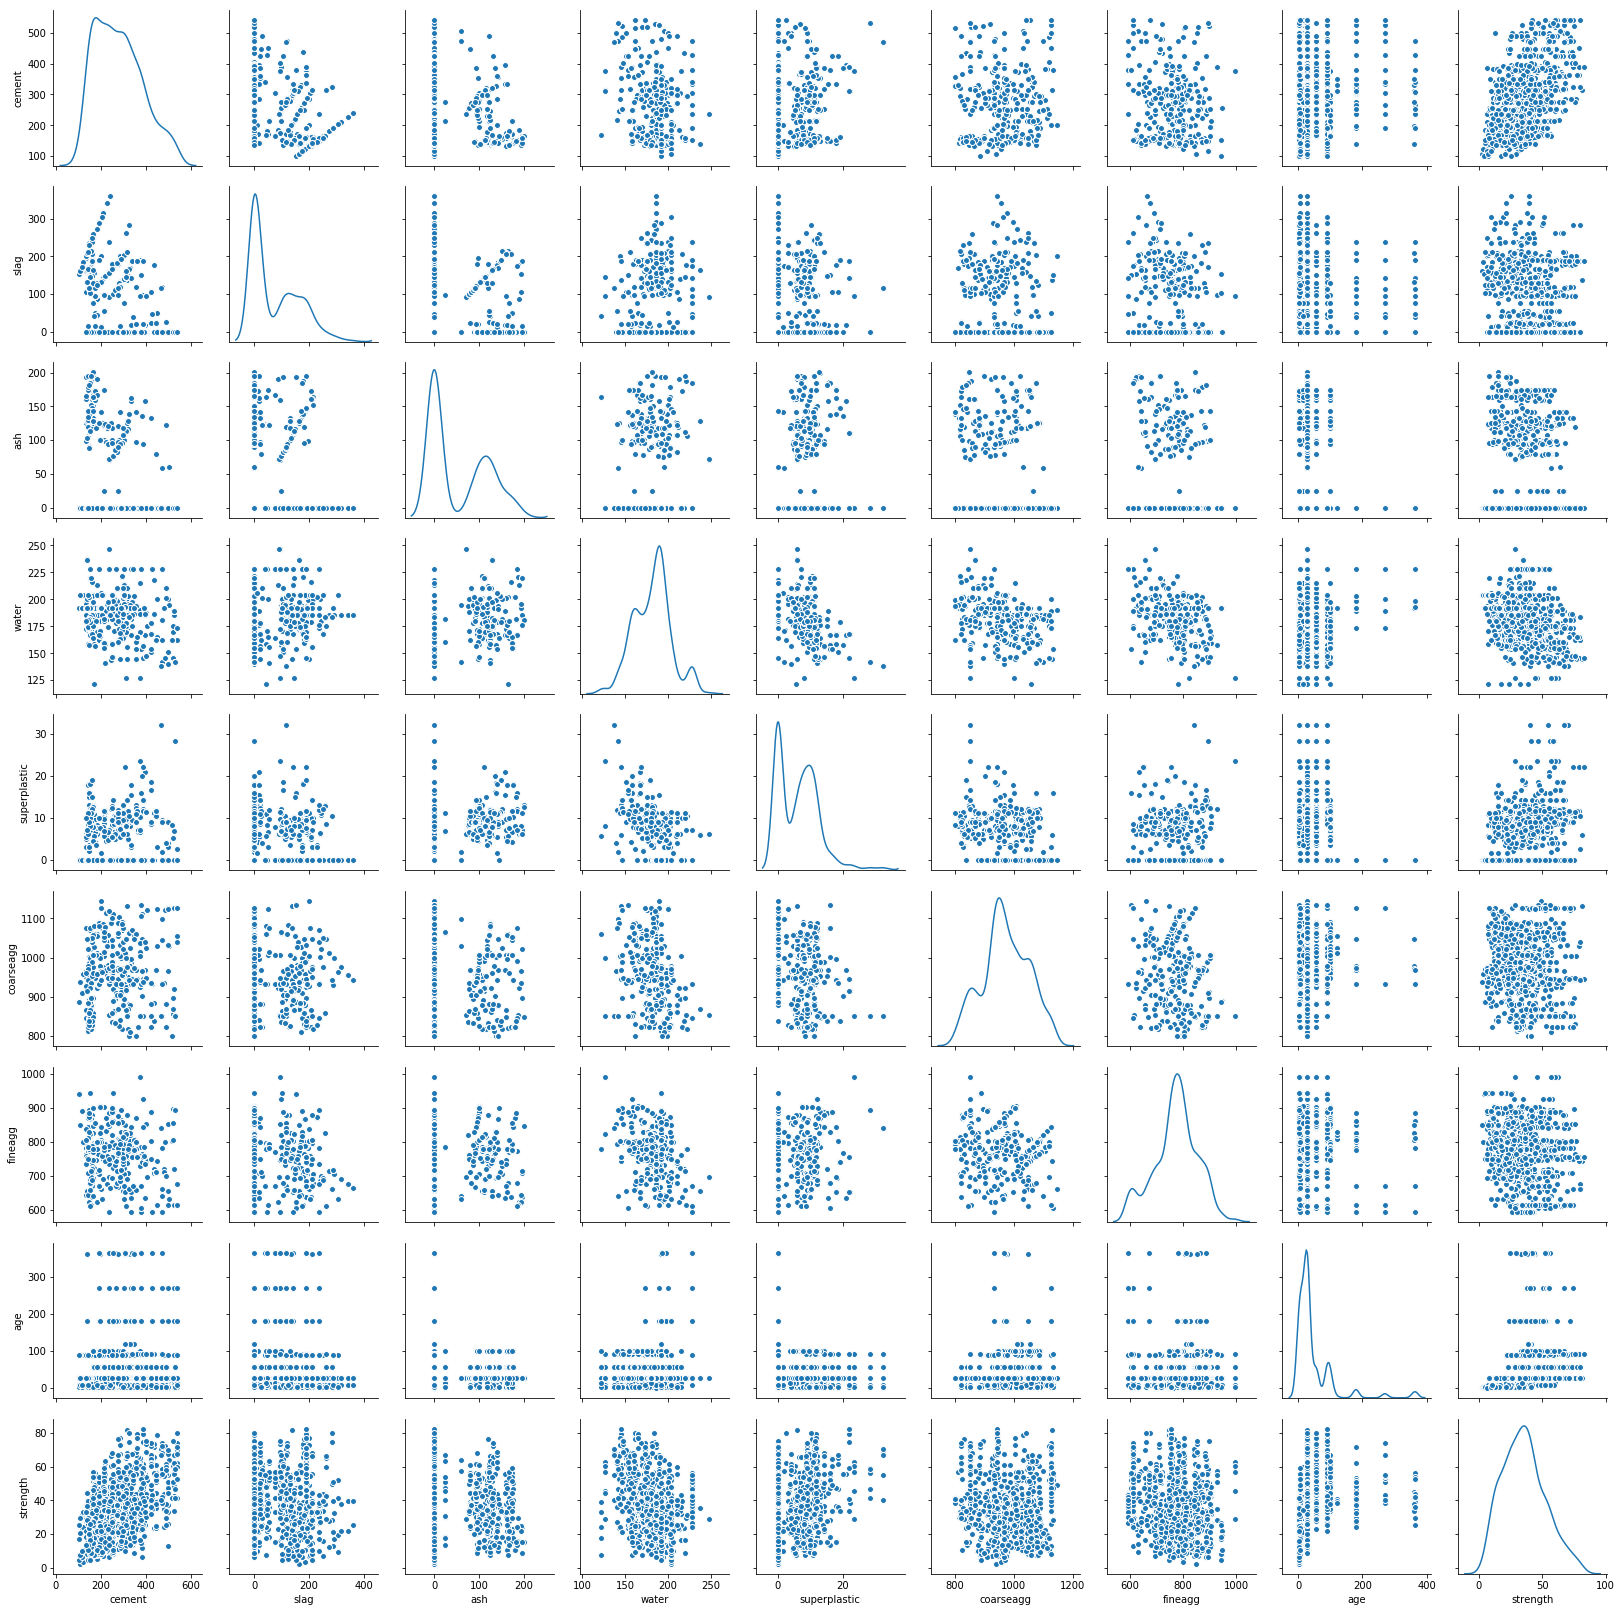

In [71]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(concrete_df , diag_kind = 'kde')

In [72]:
concrete_df_z = concrete_df.apply(zscore)   #to convert values to z score to remove different units

In [73]:
concrete_df_z = pd.DataFrame(concrete_df_z , columns  = concrete_df.columns)
concrete_df_z.describe()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,-3.858833e-16,9.593189e-18,3.634633e-16,-2.014570e-16,1.103756e-16,7.116206e-16,9.537139e-16,3.794160e-17,-3.729487e-17
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715253e+00,-8.568879e-01,-8.471439e-01,-2.800211e+00,-1.039143e+00,-2.212138e+00,-2.240917e+00,-7.073594e-01,-2.005552e+00
25%,-8.500535e-01,-8.568879e-01,-8.471439e-01,-7.808939e-01,-1.039143e+00,-5.265174e-01,-5.319697e-01,-6.123314e-01,-7.251305e-01
50%,-7.915193e-02,-6.017783e-01,-8.471439e-01,1.608294e-01,3.271508e-02,-6.329352e-02,7.386739e-02,-2.797331e-01,-8.222491e-02
75%,6.589606e-01,8.007446e-01,1.002278e+00,4.887927e-01,6.691307e-01,7.267605e-01,6.291661e-01,1.637312e-01,6.178744e-01
max,2.477915e+00,3.310675e+00,2.281084e+00,3.065647e+00,4.353642e+00,2.214224e+00,2.733062e+00,5.057677e+00,2.801717e+00


In [74]:
y = concrete_df_z[['strength']]
X = concrete_df_z.drop(labels= "strength" , axis = 1)


In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=1)

In [126]:
print(X_test.shape)
print(y_test.shape)

(309, 4)
(309, 1)


In [127]:
dt_model = DecisionTreeRegressor()

In [77]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [78]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.349517
slag          0.096389
ash           0.012633
water         0.122288
superplastic  0.020822
coarseagg     0.033876
fineagg       0.031216
age           0.333259


In [79]:
dt_model.score(X_test, y_test)

0.8653902218546136

In [80]:
dt_model.score(X_train, y_train)

0.9948592395522299

In [81]:
############################################## Iter 2... drop useless columns 

In [82]:
drop_cols = ['ash' , 'coarseagg' , 'fineagg' , 'superplastic' , 'strength']

X = concrete_df_z.drop(labels= drop_cols , axis = 1)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [84]:
dt_model = DecisionTreeRegressor()

In [85]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [86]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

             Imp
cement  0.389052
slag    0.116043
water   0.157960
age     0.336946


In [87]:
dt_model.score(X_test, y_test)

0.8511248090810575

In [88]:
dt_model.score(X_train, y_train)

0.993459432259283

In [89]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Credit_Tree_File = open('d:\concrete_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train))

Credit_Tree_File.close()

In [90]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or create a .png as below

system("dot -Tpng D:\concrete_tree.dot -o D:/concrete_tree.png")
Image("d:\concrete_tree.png")

In [91]:
########## iteration 3 Kmeans clustering

In [92]:
from sklearn.cluster import KMeans


cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(concrete_df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,cluster_errors,num_clusters
0,9270.000000,1
1,7586.051920,2
2,6368.794914,3
3,5535.265193,4
4,4812.629466,5
5,4352.205362,6
6,4041.006475,7
7,3793.922235,8
8,3599.201936,9
9,3426.591986,10


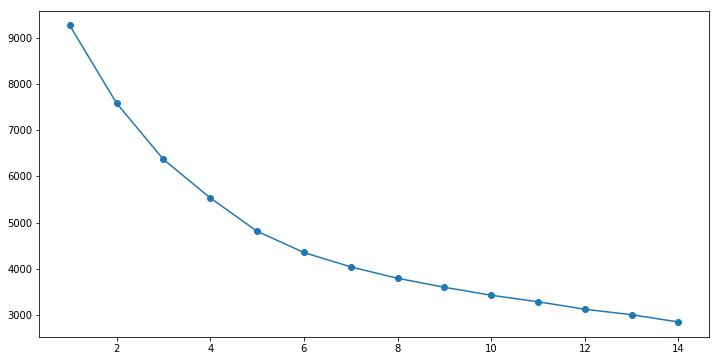

In [93]:
# Elbow plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [94]:
#kmeans = KMeans(n_clusters= 5, random_state=2345)
kmeans = KMeans(n_clusters= 6)
kmeans.fit(concrete_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [95]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[135 189 198 279  56 173]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212E6FA79E8>,
      dtype=object)

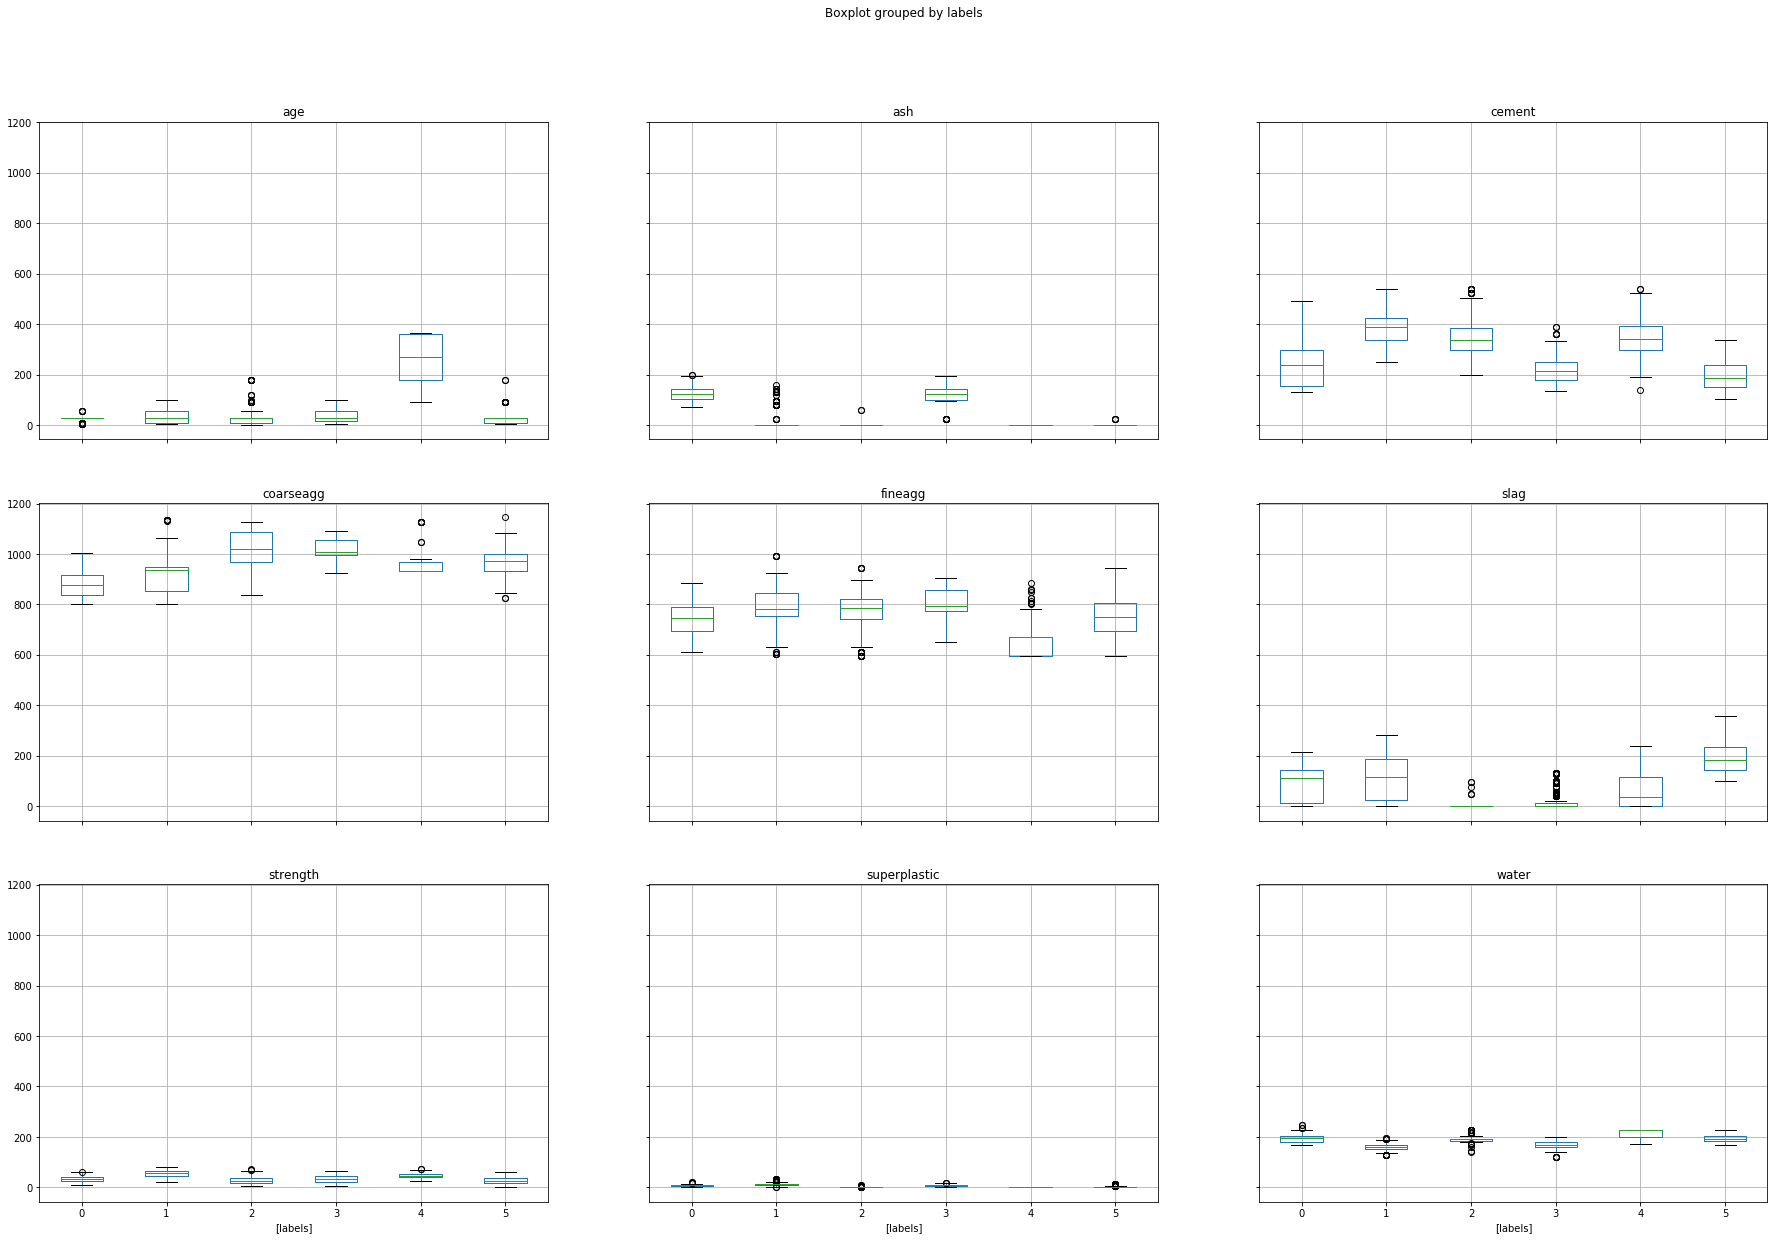

In [96]:
## creating a new dataframe only for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
concrete_df_labeled = concrete_df.join(cluster_labels)

concrete_df_labeled.boxplot(by = 'labels',  layout=(3,3), figsize=(30, 20))

In [97]:
#No distinct clusters are visible at any number of clusters. Looks like the attributes are weak predictors except for cement. 
# The potential of getting better results by breaking data into clusters is unlikely to give the desired result

In [98]:
#################### Iteration 3 ----- Ensemble Techniques....

In [99]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics



In [100]:
gbmTree = GradientBoostingRegressor(n_estimators=50)
gbmTree.fit(X_train,y_train)
print("gbmTree on training" , gbmTree.score(X_train, y_train))
print("gbmTree on test data ",gbmTree.score(X_test,y_test))


gbmTree on training 0.9051183122555869
gbmTree on test data  0.8506031132511978


C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
bgcl = BaggingRegressor(n_estimators=50, oob_score= True)
bgcl = bgcl.fit(X_train,y_train)
print("bgcl on train data ", bgcl.score(X_train,y_train))
print("bgcl on test data ", bgcl.score(X_test,y_test))
print("out of bag score" , bgcl.oob_score_)

bgcl on train data  0.9805405181989733
bgcl on test data  0.8932957578614443
out of bag score 0.8863929327465621


C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:393: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [102]:
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X_train,y_train)
print("rfTree on train data ", rfTree.score(X_train,y_train))
print("rfTree on test data ", rfTree.score(X_test,y_test))


rfTree on train data  0.9798960214343473
rfTree on test data  0.8969196908383923


C:\Users\Mukesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [103]:
concrete_XY = X.join(y)


In [104]:
# configure bootstrap



values = concrete_XY.values

n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(concrete_df_z) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	gbmTree = GradientBoostingRegressor(n_estimators=50)
	gbmTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = gbmTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = gbmTree.score(test[:, :-1] , y_test)

	stats.append(score)


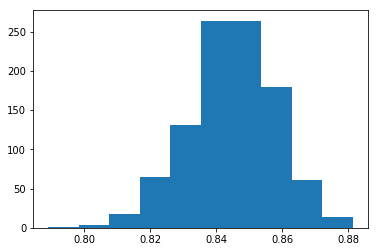

95.0 confidence interval 81.7% and 86.9%


In [48]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [415]:
# configure bootstrap




n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(concrete_df_z) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration

for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fit model
	rfTree = RandomForestRegressor(n_estimators=50)  
	rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

	rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = rfTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = rfTree.score(test[:, :-1] , y_test)

	stats.append(score)


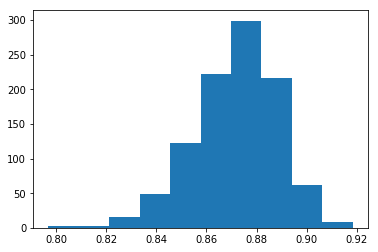

95.0 confidence interval 83.6% and 90.2%


In [416]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#                              Model Tuning using hyper parameters

In [105]:
from pprint import pprint

In [106]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1)



In [107]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


# RandomSearchCV

In [108]:
import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [109]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [110]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.0s finished
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [112]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 15}

In [113]:
best_random = rf_random.best_estimator_   # best ensemble model (with optimal combination of hyperparameters)

In [128]:
best_random.score(X_test , y_test)

0.894488389984869

In [129]:
# This is the best the randomizedsearchCV could do given the range of values we submitted. It probably got stuck in 
# subobtimal combination of hyper parameters and that is why it's result is lesser than the randomforest regressor earlier

# GridSearcCV

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

In [132]:
rf = RandomForestRegressor(random_state = 1)

In [133]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [134]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

In [135]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 7}

In [136]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test, y_test)

0.8047624621153343

In [96]:
# The accuracy is relatively lower as we have severly restricted the hyper parameter ranges. This was done to minimize 
# execution time. The Girdsearch has lower probability of finding the best combination than the randomsearch